## Ingeniería de Características: Creación de Nuevas Variables (Core)
**Descripción:**

En esta actividad, trabajarás con el dataset «Titanic – Machine Learning from Disaster» disponible en Kaggle para realizar ingeniería de características. El objetivo es crear nuevas variables a partir de las existentes y evaluar cómo estas nuevas características pueden mejorar la capacidad predictiva de un modelo de machine learning.

Enlace al dataset: [titanic](https://www.kaggle.com/c/titanic)

**Objetivo:**

El objetivo principal es desarrollar habilidades en la creación de nuevas variables que capturen información útil no presente en las variables originales. Estas nuevas características serán utilizadas para mejorar el rendimiento de un modelo de clasificación que prediga la supervivencia de los pasajeros del Titanic.


### Instrucciones:

### 1. Carga de datos:
  - Descarga y carga el dataset «Titanic» desde Kaggle. Realiza una exploración inicial de las variables disponibles, que incluyen información sobre la edad, el género, la clase del pasajero, entre otros.
  - Examina cuántos valores faltan en las variables importantes como la edad y el precio del boleto.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar el dataset de titanic
df = pd.read_csv('../data/train_titanic.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#sex, embarked to categorical
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB


In [4]:
#split the left and right ticket separator space
#df['Ticket'].str.split(' ', n = 1, expand = True)

In [5]:
#variables categoricas discretas y ordinales y variables continuas
#survived y pclass son variables categoricas discretas
#age y fare son variables continuas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Cabin,204,687,77.10
Age,714,177,19.87
Embarked,889,2,0.22
PassengerId,891,0,0.00
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
SibSp,891,0,0.00
Parch,891,0,0.00



### 2. Exploración y preprocesamiento de datos:
  - Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.
  - Revisa la distribución de las variables y asegúrate de que las categorías estén codificadas correctamente para el modelado.


In [7]:
from sklearn.impute import SimpleImputer

# imputar la edad
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])



### 3. Creación de nuevas características:
  - _Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:_
    - Tamaño de la familia: Combina las variables «SibSp» (número de hermanos/esposos) y «Parch» (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.
    - Cabina desconocida: Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la 
    - ubicación a bordo.
    - Categoría de tarifa: Agrupa la variable «Fare» en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
    - Título del pasajero: Extrae el título de cada pasajero desde la variable «Name» y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mr
    - s., Miss.).


In [8]:
# family
df['Family'] = df['SibSp'] + df['Parch']
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [9]:
#cabina desconocida
df['cabina_desconocida'] = df['Cabin'].isnull().astype(int)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,cabina_desconocida
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1


In [10]:
# agrupar pclass y ver fare min, max y mean, percentile 25, 50, 75
df.groupby('Pclass').agg({'Fare': ['min', 'max', 'mean', 'quantile']})

Fare                              
        min       max       mean quantile
Pclass                                   
1       0.0  512.3292  84.154687  60.2875
2       0.0   73.5000  20.662183  14.2500
3       0.0   69.5500  13.675550   8.0500

In [11]:
# Crear función para categorizar Fare basada en percentiles de Pclass y agregar la clase
def categorize_fare(row, bins):
    if row['Fare'] <= bins[0]:
        fare_category = 'verylow'
    elif row['Fare'] <= bins[1]:
        fare_category = 'low'
    elif row['Fare'] <= bins[2]:
        fare_category = 'medium'
    elif row['Fare'] <= bins[3]:
        fare_category = 'high'
    else:
        fare_category = 'veryhigh'
    
    pclass_description = ''
    if row['Pclass'] == 1:
        pclass_description = 'high'
    elif row['Pclass'] == 2:
        pclass_description = 'medium'
    elif row['Pclass'] == 3:
        pclass_description = 'low'
    
    return f'{pclass_description}-{fare_category}'

# Calcular percentiles para cada clase
percentiles = df.groupby('Pclass')['Fare'].quantile([0, 0.25, 0.5, 0.75, 1]).unstack(level=1)

# Crear nueva columna 'Fare_Category' basada en los percentiles y clase
df['fare_category'] = df.apply(lambda row: categorize_fare(row, percentiles.loc[row['Pclass']].values), axis=1)

# Verificar los primeros registros para asegurarnos de que la nueva columna se ha creado correctamente
print(df[['Pclass', 'Fare', 'fare_category']].head())


   Pclass     Fare fare_category
0       3   7.2500       low-low
1       1  71.2833     high-high
2       3   7.9250    low-medium
3       1  53.1000   high-medium
4       3   8.0500    low-medium


In [12]:
# Crear una función para extraer el título
def extract_title(name):
    import re
    match = re.search(r',\s*(\w+\.)', name)
    if match:
        return match.group(1).strip()  # Eliminar cualquier espacio blanco accidentalmente capturado
    return ''

# Aplicar la función a la columna 'Name' y crear una nueva columna 'Title'
df['Title'] = df['Name'].apply(extract_title)

# Verificar los primeros registros para asegurarnos de que la nueva columna se ha creado correctamente
print(df[['Name', 'Title']].head())


                                                Name  Title
0                            Braund, Mr. Owen Harris    Mr.
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs.
2                             Heikkinen, Miss. Laina  Miss.
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs.
4                           Allen, Mr. William Henry    Mr.


In [13]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    category
 5   Age                 891 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               204 non-null    object  
 11  Embarked            889 non-null    category
 12  Family              891 non-null    int64   
 13  cabina_desconocida  891 non-null    int32   
 14  fare_category       891 non-null    object  
 15  Title               891 non-null    obje

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,cabina_desconocida,fare_category,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,1,low-low,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,0,high-high,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,low-medium,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,0,high-medium,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,1,low-medium,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,1,medium-low,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,0,high-low,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3,1,low-veryhigh,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,0,high-low,Mr.


In [14]:
# convertur fare_category, cabin y title a categorical
df['fare_category'] = df['fare_category'].astype('category')
df['Title'] = df['Title'].astype('category')
df['Cabin'] = df['Cabin'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    category
 5   Age                 891 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               204 non-null    category
 11  Embarked            889 non-null    category
 12  Family              891 non-null    int64   
 13  cabina_desconocida  891 non-null    int32   
 14  fare_category       891 non-null    category
 15  Title               891 non-null    cate

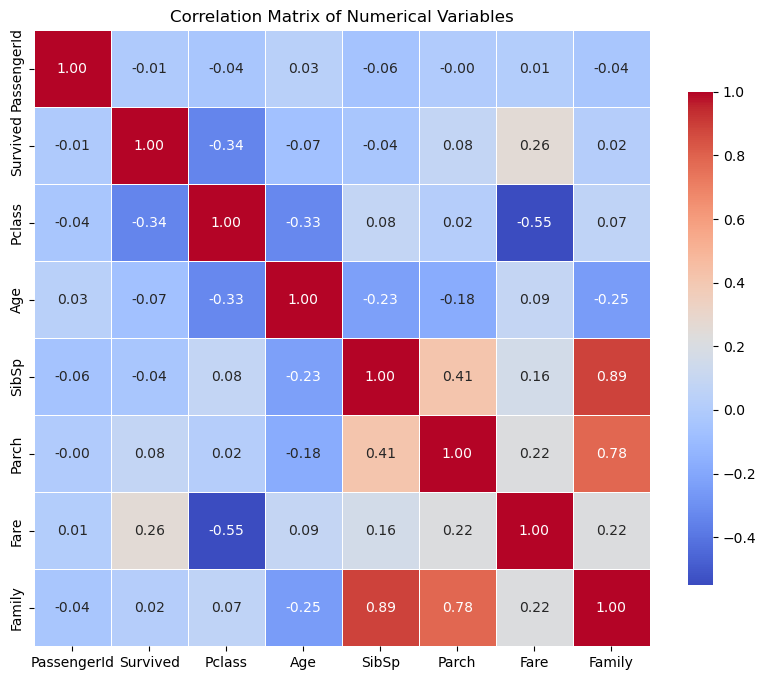

In [15]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [16]:
# Map Pclass (categorical) to ordinal values
pclass_to_ordinal = {"Upper": 3, "Middle": 2, "Lower": 1}
df['PclassOrdinal'] = df['Pclass'].map(pclass_to_ordinal)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encode_sex = LabelEncoder()
df['Sex'] = encode_sex.fit_transform(df['Sex'])  # male=1, female=0
encode_embarked = LabelEncoder()
df['Embarked'] = encode_embarked.fit_transform(df['Embarked'])  # S=0, C=1, Q=2
encode_cabin = LabelEncoder()
df['Cabin'] = encode_cabin.fit_transform(df['Cabin'])

In [18]:
# Mean encoding for PclassOrdinal with Survived
mean_encoding = df.groupby('Pclass')['Survived'].mean().to_dict()
# Map the mean encoding back to the train dataset
df['Pclass_mean_encoded'] = df['Pclass'].map(mean_encoding)

# Display the mean encoding dictionary and the first few rows of the updated DataFrame
print("Mean Encoding Dictionary:", mean_encoding)

Mean Encoding Dictionary: {1: 0.6296296296296297, 2: 0.47282608695652173, 3: 0.24236252545824846}


In [19]:
df.dtypes

PassengerId               int64
Survived                  int64
Pclass                    int64
Name                     object
Sex                       int32
Age                     float64
SibSp                     int64
Parch                     int64
Ticket                   object
Fare                    float64
Cabin                     int32
Embarked                  int32
Family                    int64
cabina_desconocida        int32
fare_category          category
Title                  category
PclassOrdinal           float64
Pclass_mean_encoded     float64
dtype: object


### 4. Evaluación de nuevas características:
  - Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.
  - Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.


In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score

# Dividir en variables independientes (X) y dependiente (y)
categorical_columns = ['Sex', 'Cabin', 'Embarked', 'Pclass']
numerical_columns = ['Fare', 'Age', 'SibSp', 'Parch']
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de datos
# Pipeline para variables numéricas: imputación y escalado
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas: imputación y codificación One-Hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Pipeline completo con preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Evaluate Logistic Regression
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
rf_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Logistic Regression ROC-AUC Score: {rf_roc_auc}")


Accuracy: 0.8045
F1-Score: 0.7552
Precision: 0.7826
Recall: 0.7297
Logistic Regression:
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Logistic Regression ROC-AUC Score: 0.8751608751608752


In [30]:
# Dividir en variables independientes (X) y dependiente (y)
categorical_columns_2 = ['PclassOrdinal', 'Sex', 'Cabin','Embarked', 'fare_category', 'Title']
numerical_columns_2 = ['Fare','Age','SibSp','Parch','Family','Pclass_mean_encoded']
X = df.drop(columns=['Survived','Pclass', 'Name', 'Ticket','PassengerId'])
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Combinar los transformadores en un ColumnTransformer
preprocessor_2 = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns_2),
    ('cat', categorical_transformer, categorical_columns_2)
])

# Pipeline completo con preprocesamiento y modelo
pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('classifier', LogisticRegression())
])

# Entrenar el modelo
pipeline_2.fit(X_train_2, y_train_2)

# Hacer predicciones en el conjunto de prueba
y_pred_2 = pipeline_2.predict(X_test_2)
y_pred_proba_2 = pipeline_2.predict_proba(X_test_2)[:, 1]

# Calcular las métricas de evaluación
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
f1_2 = f1_score(y_test_2, y_pred_2)
precision_2 = precision_score(y_test_2, y_pred_2)
recall_2 = recall_score(y_test_2, y_pred_2)

# Mostrar resultados
print(f"Accuracy: {accuracy_2:.4f}")
print(f"F1-Score: {f1_2:.4f}")
print(f"Precision: {precision_2:.4f}")
print(f"Recall: {recall_2:.4f}")

# Evaluate Random Forest
print("Logistic Regression new variables:")
print(confusion_matrix(y_test_2, y_pred_2))
print(classification_report(y_test_2, y_pred_2))
rf_roc_auc = roc_auc_score(y_test_2, y_pred_proba_2)
print(f"Logistic Regression ROC-AUC Score: {rf_roc_auc}")




Accuracy: 0.8212
F1-Score: 0.7808
Precision: 0.7917
Recall: 0.7703
Logistic Regression new variables:
[[90 15]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Logistic Regression ROC-AUC Score: 0.8894465894465895


c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['PclassOrdinal']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['PclassOrdinal']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['PclassOrdinal']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline completo con preprocesamiento y modelo
pipeline_3 = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('rfc', RandomForestClassifier(random_state=42))
])
# Train Random Forest Classifier
pipeline_3.fit(X_train_2, y_train_2)

# Predict with Random Forest
rf_pred = pipeline_3.predict(X_test_2)
rf_pred_proba = pipeline_3.predict_proba(X_test_2)[:, 1]

# Evaluate Random Forest
print("Random Forest Metrics:")
print(confusion_matrix(y_test_2, rf_pred))
print(classification_report(y_test_2, rf_pred))
rf_roc_auc = roc_auc_score(y_test_2, rf_pred_proba)
print(f"Random Forest ROC-AUC Score: {rf_roc_auc}")


c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['PclassOrdinal']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['PclassOrdinal']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Random Forest Metrics:
[[94 11]
 [16 58]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

Random Forest ROC-AUC Score: 0.8895752895752896


c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['PclassOrdinal']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(



### 5. Interpretación de los resultados:
  - Analiza cuáles de las nuevas características tuvieron el mayor impacto en el rendimiento del modelo. ¿Cómo ayudaron a mejorar la capacidad predictiva del modelo en comparación con las variables originales?
  - Discute cómo las nuevas características creadas representan una mejor captura de la información sobre los pasajeros.


### Análisis de Resultados:

  - El análisis debe centrarse en la importancia de las nuevas variables y su capacidad para mejorar la predicción de la supervivencia en el Titanic. Discute los beneficios de realizar ingeniería de características y cómo estas nuevas variables pueden capturar información latente en los datos originales.